# Importy

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


Konstanty

In [ ]:
SAMPLING_RATE = 500
DOWNSAMPLE = 2
Y_COLS = ['diagnosis']
Y_LABELS = ['premature ventricular beat']

# Načtení dat


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_folder = Path('/content/drive/My Drive/DataDP')
list(data_folder.glob('*'))[:4]

[PosixPath('/content/drive/My Drive/DataDP/fd5eda1200.json'),
 PosixPath('/content/drive/My Drive/DataDP/f164e88800.json'),
 PosixPath('/content/drive/My Drive/DataDP/f813505a00.json'),
 PosixPath('/content/drive/My Drive/DataDP/8ffc8baa00.json')]

Uložení dat do dataframu

In [ ]:
dfs = {}
for file in list(data_folder.glob('*.json')):
    with open(file, 'r') as rf:
        json_data = json.load(rf)
    x = {}
    id = json_data['patient']['id']
    for sensor_reading in json_data['data']:
        if sensor_reading['name'] in ('global', ):
            continue
        x[sensor_reading['name']] = sensor_reading['content'][::]
    x['diagnosis'] = [[diag['name'] for diag in json_data['diagnosis']], ] * len(x['III'])

    dfs[id] = pd.DataFrame(x)

plain_df = pd.concat(dfs.values(), axis=0, keys=dfs.keys(), names=['id', 'time'])
plain_df

I  ...                                          diagnosis
id         time       ...                                                   
92cc718e00 0     379  ...                          [sinus rhythm, noisy ECG]
           1     377  ...                          [sinus rhythm, noisy ECG]
           2     389  ...                          [sinus rhythm, noisy ECG]
           3     398  ...                          [sinus rhythm, noisy ECG]
           4     396  ...                          [sinus rhythm, noisy ECG]
...              ...  ...                                                ...
2a41815f00 4995  256  ...  [sinus rhythm, left bundle brunch block, prema...
           4996  184  ...  [sinus rhythm, left bundle brunch block, prema...
           4997  129  ...  [sinus rhythm, left bundle brunch block, prema...
           4998   85  ...  [sinus rhythm, left bundle brunch block, prema...
           4999   27  ...  [sinus rhythm, left bundle brunch block, prema...

[34385000 rows x 13 columns]

In [ ]:
plain_df.groupby('id').diagnosis.head(1)

NameError: ignored

#Uložení dat do pickle


In [ ]:
plain_df.to_pickle(data_folder / 'plain_df_all.pkl')

# Načtení dat z pickle



In [ ]:
%%time
plain_df = pd.read_pickle(data_folder / 'plain_df_all.pkl')

CPU times: user 2.47 s, sys: 4.51 s, total: 6.98 s
Wall time: 7.71 s


# Předzpracování

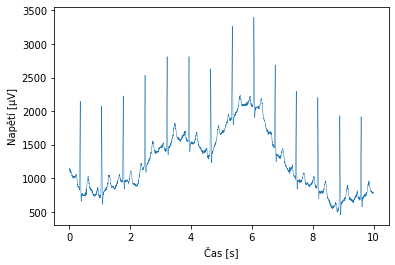

In [ ]:
y = plain_df.loc['feebbf0200','I']
x = np.linspace(0,10,num=5000)
plt.plot(x,y,linewidth=0.5)
plt.xlabel('Čas [s]')
plt.ylabel('Napětí [\u03BCV]')

plt.savefig(f'{data_folder}/signal_pred_filtraci_pred_decimaci.png', dpi=400)
plt.savefig(f'{data_folder}/signal_pred_filtraci_pred_decimaci.svg', dpi=400)

## Podvzorkování
Podvzorkování dat z 500 Hz na 250 Hz

In [ ]:
df = plain_df.iloc[::DOWNSAMPLE]
df

I  ...                                          diagnosis
id         time       ...                                                   
92cc718e00 0     379  ...                          [sinus rhythm, noisy ECG]
           2     389  ...                          [sinus rhythm, noisy ECG]
           4     396  ...                          [sinus rhythm, noisy ECG]
           6     384  ...                          [sinus rhythm, noisy ECG]
           8     392  ...                          [sinus rhythm, noisy ECG]
...              ...  ...                                                ...
2a41815f00 4990  230  ...  [sinus rhythm, left bundle brunch block, prema...
           4992  290  ...  [sinus rhythm, left bundle brunch block, prema...
           4994  312  ...  [sinus rhythm, left bundle brunch block, prema...
           4996  184  ...  [sinus rhythm, left bundle brunch block, prema...
           4998   85  ...  [sinus rhythm, left bundle brunch block, prema...

[17192500 rows x 13 columns]

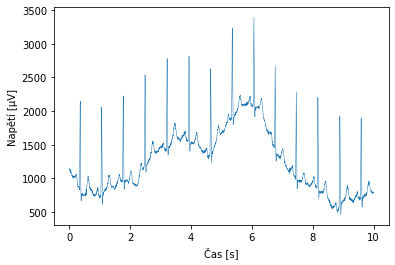

In [ ]:
y = df.loc['feebbf0200','I']
x = np.linspace(0,10,num=2500)
plt.plot(x,y,linewidth=0.5)
plt.xlabel('Čas [s]')
plt.ylabel('Napětí [\u03BCV]')

plt.savefig(f'{data_folder}/signal_pred_filtraci_po_decimaci.png', dpi=400)
plt.savefig(f'{data_folder}/signal_pred_filtraci_po_decimaci.svg', dpi=400)

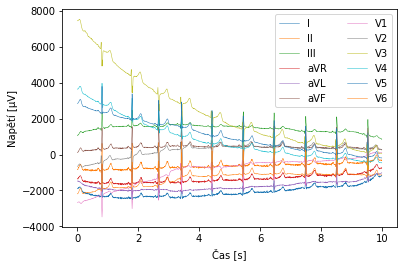

In [ ]:
y1=df.loc['ff8f7caa00','I']
y2=df.loc['ff8f7caa00','II']
y3=df.loc['ff8f7caa00','III']
y4=df.loc['ff8f7caa00','aVR']
y5=df.loc['ff8f7caa00','aVL']
y6=df.loc['ff8f7caa00','aVF']
y7=df.loc['ff8f7caa00','V1']
y8=df.loc['ff8f7caa00','V2']
y9=df.loc['ff8f7caa00','V3']
y10=df.loc['ff8f7caa00','V4']
y11=df.loc['ff8f7caa00','V5']
y12=df.loc['ff8f7caa00','V6']
plt.plot(x,y1,linewidth=0.5)
plt.plot(x,y2,linewidth=0.5)
plt.plot(x,y3,linewidth=0.5)
plt.plot(x,y4,linewidth=0.5)
plt.plot(x,y5,linewidth=0.5)
plt.plot(x,y6,linewidth=0.5)
plt.plot(x,y7,linewidth=0.5)
plt.plot(x,y8,linewidth=0.5)
plt.plot(x,y9,linewidth=0.5)
plt.plot(x,y10,linewidth=0.5)
plt.plot(x,y11,linewidth=0.5)
plt.plot(x,y12,linewidth=0.5)
plt.xlabel('Čas [s]')
plt.ylabel('Napětí [\u03BCV]')
plt.legend(['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6'],loc="upper right",ncol=2)
plt.savefig(f'{data_folder}/vsechny_svody_pred_filtraci_po_decimaci.png', dpi=400)
plt.savefig(f'{data_folder}/vsechny_svody_pred_filtraci_po_decimaci.svg', dpi=400)
plt.show()

## Filtrace
bandstop 50 Hz a highpass 0,5 Hz

In [ ]:
df = plain_df

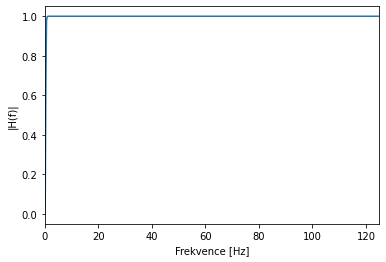

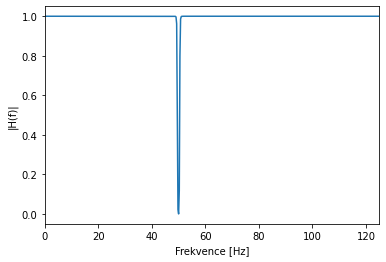

In [ ]:
from scipy.signal import butter, sosfiltfilt, sosfilt, sosfreqz

f_s = 250
lowcut = 0.5
order = 4

sos = butter(order, lowcut, btype='highpass', output='sos', fs=f_s)
sos2 = butter(order, [49.5, 50.5], btype='bandstop', output='sos', fs=f_s)

w1, h1 = sosfreqz(sos, fs=f_s)
y1 = np.abs(h1)
plt.plot(w1,y1)
plt.xlim(0, 125)
plt.xlabel('Frekvence [Hz]')
plt.ylabel('|H(f)|')
plt.savefig(f'{data_folder}/frekv_char_0.5Hz.png', dpi=400)
plt.show()

w2, h2 = sosfreqz(sos2, fs=f_s)
y2 = np.abs(h2)
plt.plot(w2,y2)
plt.xlim(0, 125)
plt.xlabel('Frekvence [Hz]')
plt.ylabel('|H(f)|')
plt.savefig(f'{data_folder}/frekv_char_50Hz.png', dpi=400)
plt.show()

In [ ]:
#df.loc['feebbf0200','I'] = sosfiltfilt(sos, df.loc['feebbf0200','I'])
#df.loc['feebbf0200','I'] = sosfilt(sos2, df.loc['feebbf0200','I'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


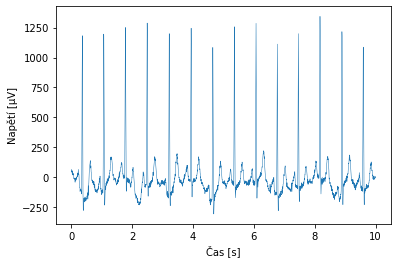

In [ ]:
y = df.loc['feebbf0200','I']
x = np.linspace(0,10,num=2500)
plt.plot(x,y,linewidth=0.5)
plt.xlabel('Čas [s]')
plt.ylabel('Napětí [\u03BCV]')

plt.savefig(f'{data_folder}/signal_po_filtraci_po_decimaci.png', dpi=400)
plt.savefig(f'{data_folder}/signal_po_filtraci_po_decimaci.svg', dpi=400)


In [ ]:
#filtrace - každý svod zvlášť pro každé id, filtrace driftu nulové izolinie

for m in range(0, len(df), 2500):
  for i in range(12):
    df.iloc[m:m+2500,i] = sosfiltfilt(sos, df.iloc[m:m+2500,i])
    df.iloc[m:m+2500,i] = sosfilt(sos2, df.iloc[m:m+2500,i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


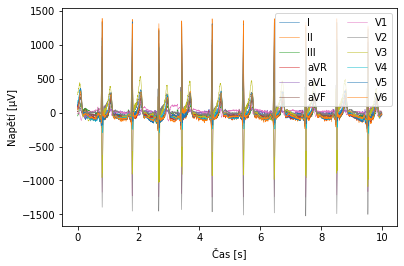

In [ ]:
x = np.linspace(0,10,num=2500)
y1=df.loc['ff8f7caa00','I']
y2=df.loc['ff8f7caa00','II']
y3=df.loc['ff8f7caa00','III']
y4=df.loc['ff8f7caa00','aVR']
y5=df.loc['ff8f7caa00','aVL']
y6=df.loc['ff8f7caa00','aVF']
y7=df.loc['ff8f7caa00','V1']
y8=df.loc['ff8f7caa00','V2']
y9=df.loc['ff8f7caa00','V3']
y10=df.loc['ff8f7caa00','V4']
y11=df.loc['ff8f7caa00','V5']
y12=df.loc['ff8f7caa00','V6']
plt.plot(x,y1,linewidth=0.5)
plt.plot(x,y2,linewidth=0.5)
plt.plot(x,y3,linewidth=0.5)
plt.plot(x,y4,linewidth=0.5)
plt.plot(x,y5,linewidth=0.5)
plt.plot(x,y6,linewidth=0.5)
plt.plot(x,y7,linewidth=0.5)
plt.plot(x,y8,linewidth=0.5)
plt.plot(x,y9,linewidth=0.5)
plt.plot(x,y10,linewidth=0.5)
plt.plot(x,y11,linewidth=0.5)
plt.plot(x,y12,linewidth=0.5)
plt.xlabel('Čas [s]')
plt.ylabel('Napětí [\u03BCV]')
plt.legend(['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6'],loc="upper right",ncol=2)
plt.savefig(f'{data_folder}/vsechny_svody_po_filtraci_po_decimaci.png', dpi=400)
plt.savefig(f'{data_folder}/vsechny_svody_po_filtraci_po_decimaci.svg', dpi=400)
plt.show()

In [ ]:
df.to_pickle(data_folder / 'plain_df_all_filter1603.pkl')

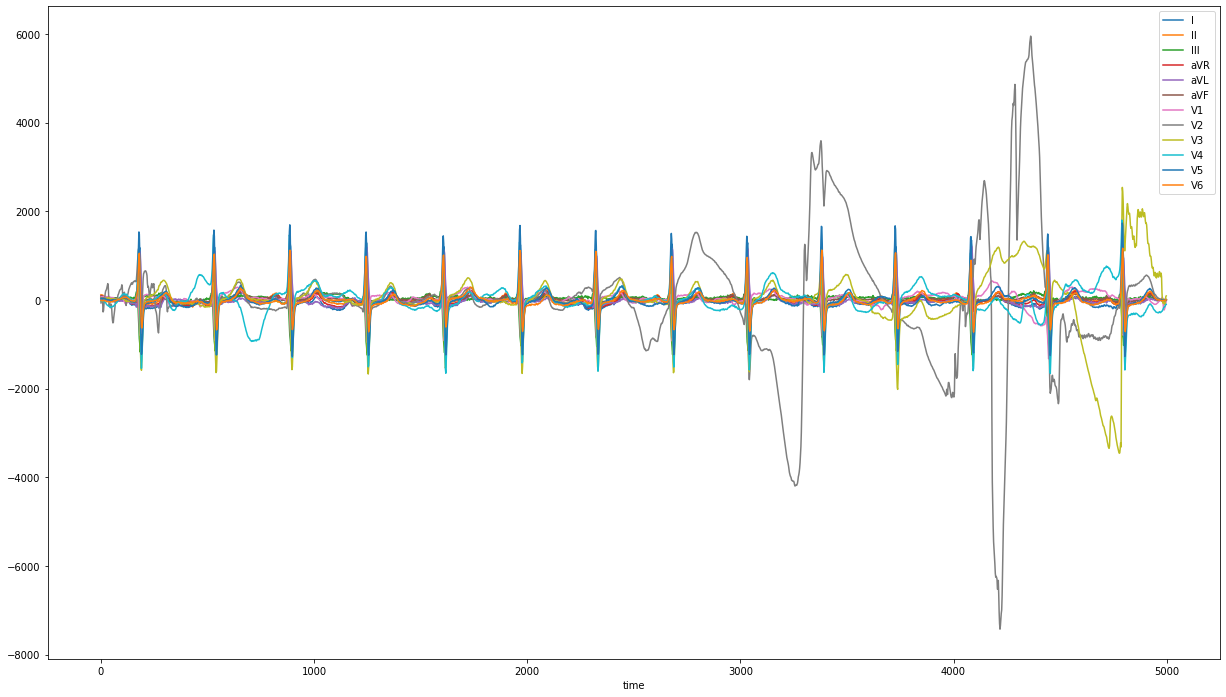

In [ ]:
df.loc['feebbf0200'].plot(figsize=(21, 12))

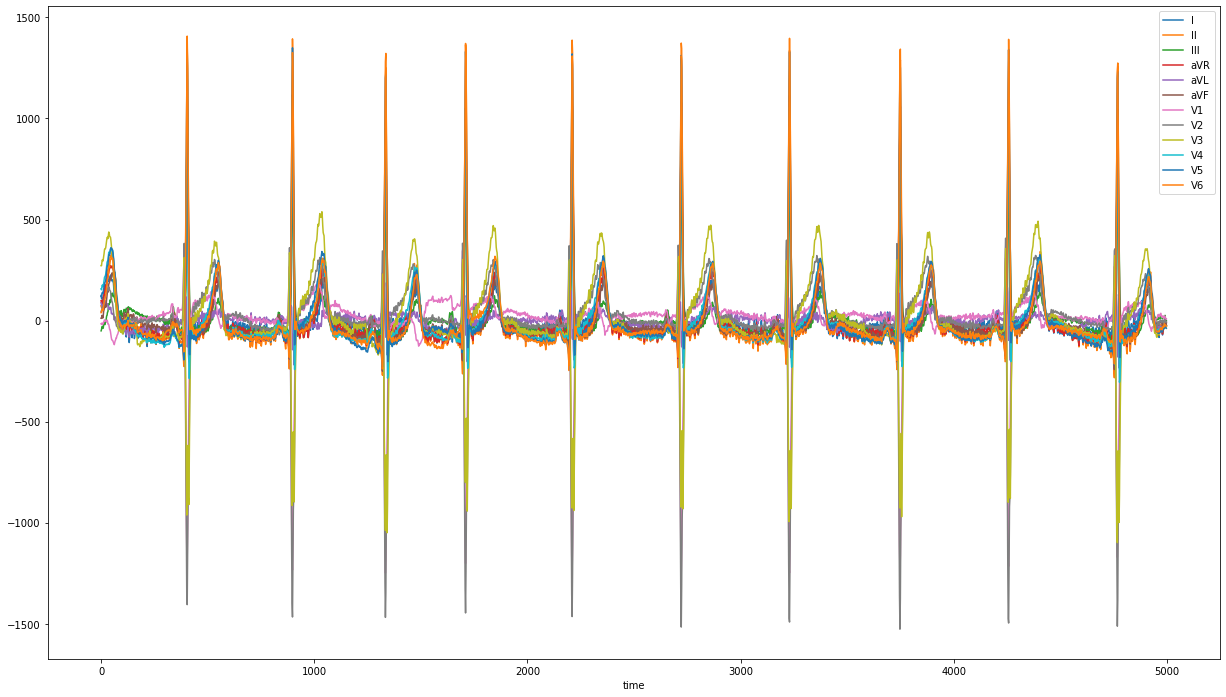

In [ ]:
df.loc['ff8f7caa00'].plot(figsize=(21, 12))

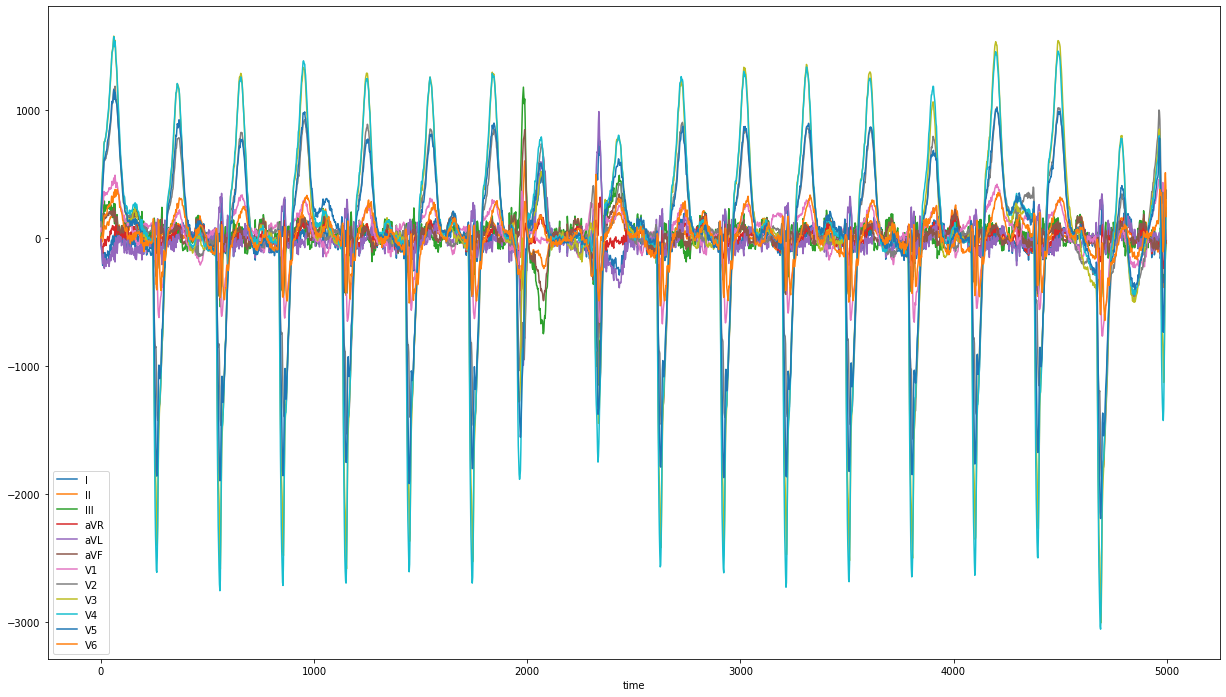

In [ ]:
df.loc['2a41815f00'].plot(figsize=(21, 12))